In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import xgboost as xgb
from sklearn.metrics import mean_squared_error

In [2]:
df1=pd.read_csv('train.csv', encoding='utf-8')
df2=pd.read_csv('test.csv', encoding='utf-8')
df1.drop('Id', axis=1, inplace=True)

In [3]:
print(df1.isnull().sum())


MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 80, dtype: int64


In [4]:
print(df2.isnull().sum())


Id                 0
MSSubClass         0
MSZoning           4
LotFrontage      227
LotArea            0
                ... 
MiscVal            0
MoSold             0
YrSold             0
SaleType           1
SaleCondition      0
Length: 80, dtype: int64


In [5]:
df1 = df1.drop(columns=['LotFrontage'])
#df1 = df1.dropna(axis=1)


In [6]:
df2 = df2.drop(columns=['LotFrontage'])
#df2 = df2.dropna(axis=1)


In [7]:
df2

,Id,MSSubClass,MSZoning,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,5005,Pave,NaN,IR1,HLS,AllPub,Inside,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,10441,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


In [8]:
df1

,MSSubClass,MSZoning,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,20,RL,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,70,RL,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,20,RL,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [9]:
from sklearn.preprocessing import LabelEncoder

# Apply LabelEncoder to all categorical columns
label_encoders = {}  # To store the encoders for each column
for col in df1.select_dtypes(include=['object', 'category']).columns:
    le = LabelEncoder()
    df1[col] = le.fit_transform(df1[col])
    df2[col] = le.fit_transform(df2[col])
    label_encoders[col] = le  # Save the encoder for inverse transform if needed

In [10]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)  # n_neighbors defines the number of neighbors to use
# Assuming df1 is your DataFrame
df1_imputed = pd.DataFrame(imputer.fit_transform(df1), columns=df1.columns)

In [11]:
df1=df1_imputed

In [12]:
df2_imputed = pd.DataFrame(imputer.fit_transform(df2), columns=df2.columns)
df2=df2_imputed

Mean Squared Error: 0.08
Root Mean Squared Error: 0.28


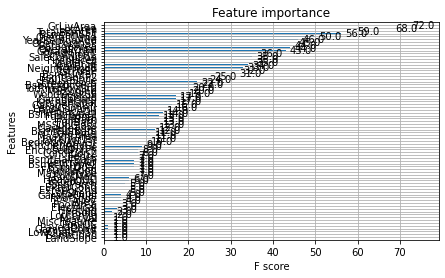

In [13]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import xgboost as xgb
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt  # Imported for plotting

# Assuming df1 is your original DataFrame with a column 'SalePrice'
# Replace df1 with your actual data if necessary

# Initialize StandardScaler objects
scaler_X = StandardScaler()
scaler_Y = StandardScaler()

# Separate features and target variable
X = df1.drop('SalePrice', axis=1)  # Drop the target column from the features
Y = df1['SalePrice']  # Target variable

# Fit and transform the feature data
X_df = scaler_X.fit_transform(X)

# Convert the scaled features back into a DataFrame with the original column names
X_df = pd.DataFrame(X_df, columns=X.columns)

# Since SalePrice is the target, we scale it as well (for better model performance)
Y_df = scaler_Y.fit_transform(Y.values.reshape(-1, 1))  # Reshaping Y to 2D for scaling

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X_df, Y_df, test_size=0.02, random_state=42)

# Initialize the XGBoost regressor model
xgb_regressor = xgb.XGBRegressor(
    objective='reg:squarederror',  # Objective for regression
    colsample_bytree=0.3,          # Fraction of features to use for each tree
    learning_rate=0.1,             # Step size for each iteration
    max_depth=5,                   # Maximum depth of trees
    alpha=10,                      # L1 regularization term
    n_estimators=100,              # Number of boosting rounds
    eval_metric='rmse'             # Root Mean Squared Error as evaluation metric
)

# Train the model
xgb_regressor.fit(X_train, Y_train)

# Make predictions
y_pred = xgb_regressor.predict(X_test)

# Evaluate the model
mse = mean_squared_error(Y_test, y_pred)  # Mean Squared Error
rmse = mse ** 0.5  # Root Mean Squared Error
print(f"Mean Squared Error: {mse:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")

# Feature Importance (Optional - visualizing the feature importance)
# Now, XGBoost will use the feature names from the DataFrame
xgb.plot_importance(xgb_regressor)
plt.show()


In [21]:
import pandas as pd
import xgboost as xgb
from sklearn.preprocessing import StandardScaler

# Assuming df1 is your original DataFrame with a column 'SalePrice' and df2 is the new test dataset
# Ensure that df2 is loaded correctly
X1_test = df2  # Load the new test set

# Align the columns of the test set with the columns of the training set (same features)
X1_test = X1_test[X_train.columns]  # Ensure same feature columns in both training and test set

# Convert the 'Id' column to numeric (just in case it has non-numeric values)

# Apply the same scaling to the test data (using the scaler from the training data)
X1_test_scaled = scaler_X.transform(X1_test)  # Don't fit, just transform with the already-fitted scaler

# Make predictions with the trained model
test_predictions_scaled = xgb_regressor.predict(X1_test_scaled)

# If necessary, inverse transform the predictions (if they were scaled)
test_predictions = scaler_Y.inverse_transform(test_predictions_scaled.reshape(-1, 1))

# Ensure 'Id' is correctly included as an integer column for saving the results

# Save the predictions to a CSV file, including the 'Id' column
predictions_df = pd.DataFrame({'Id': df2['Id'], 'SalePrice': test_predictions.flatten()})

predictions_df['Id'] = predictions_df['Id'].astype('Int32')
predictions_df.to_csv('xgboost_predictions.csv', index=False)

print("Training on the full dataset is complete. Predictions saved!")


Training on the full dataset is complete. Predictions saved!


In [19]:
predictions_df

,Id,SalePrice
0,1461,123011.257812
1,1462,160248.109375
2,1463,171938.640625
3,1464,183702.984375
4,1465,197276.203125
...,...,...
1454,2915,93015.718750
1455,2916,88032.875000
1456,2917,163269.640625
1457,2918,120294.195312


In [20]:
print(predictions_df['Id'].dtype)

Int32


In [15]:
print(df2.columns)


Index(['Id', 'MSSubClass', 'MSZoning', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckSF'